## Install Libraries

In our github folder, we have requirements.txt file where all the libraries we need for this EDA and modelling notebook.

In [163]:
pip install -r "/Users/dcnguyen060899/Downloads/First_Quarter_Seattle_U_2025:2026/DATA_5100-01/weather/requirements.txt"


Note: you may need to restart the kernel to use updated packages.


# Load Libraries

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

# Load Data Set

In [ ]:

df = pd.read_csv('/Users/dcnguyen060899/Downloads/First_Quarter_Seattle_U_2025:2026/DATA_5100-01/weather/data/clean_seattle_atlanta_seattle_weather.csv')

checking the data type

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           3652 non-null   object 
 1   city           3652 non-null   object 
 2   precipitation  3652 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.7+ KB


Something surprisingly here is that, in our data_cleaning step, we converted object to datetime already. However, as we load the cleaned data to a new notebook, pandas read it as objet again. Hence, we need to convert it again.

In [167]:
df.DATE = pd.to_datetime(df.DATE)

In [168]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                               
             count     mean       std  min  25%   50%   75%   max
city                                                             
ATL         1826.0  0.15483  0.428949  0.0  0.0  0.00  0.07  4.55
SEA         1826.0  0.11335  0.240541  0.0  0.0  0.01  0.12  2.60

Looking at this Summary Statistics, we can observe:

1. Average Daily Rainfall:
    - Atlanta: 0.155 inches
    - Seattle: 0.113 inches
    - Contrary to popular perception, Atlanta experiences higher daily rainfall amounts
2. Rainfall Patterns:
    - Atlanta: Less frequent but more intense rainfall events
    - Seattle: More frequent but lighter rainfall
    - Atlanta shows higher variability in precipitation amounts

3. Rain Frequency
    - Atlanta: No rain recorded on approximately 50% of days
    - Seattle: More consistent rainfall throughout the year
4. Maximum Rainfall
    - Atlanta recorded the highest single-day rainfall at 4.55 inches
    - Indicates potential for severe weather events in Atlanta

#### Averaging precipitation across each city from 2018 to 2022

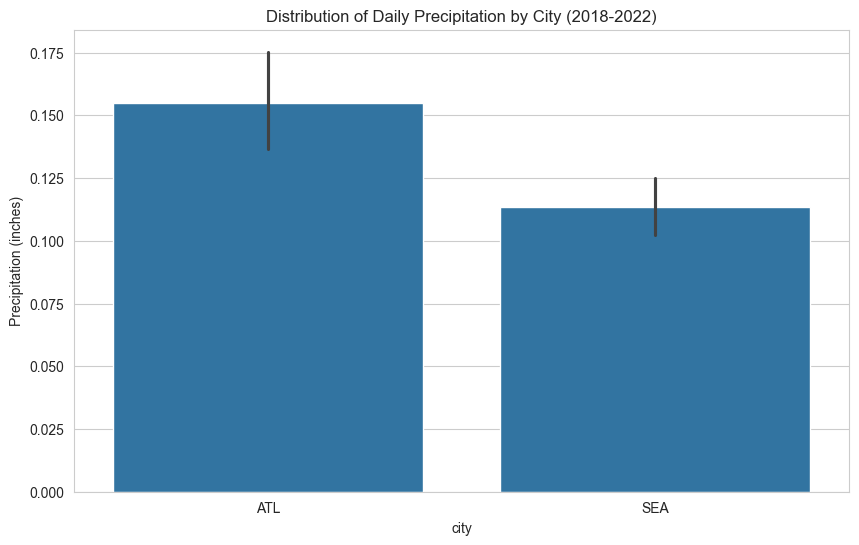

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='city', y='precipitation')
plt.title('Distribution of Daily Precipitation by City (2018-2022)')
plt.ylabel('Precipitation (inches)')
plt.show()

This visualization reveals some key differences in rainfall pattern we can confirm with the summary statistic:

Key Insights

    - Atlanta shows higher average daily precipitation
    - Error bars indicate statistical uncertainty in the measurements
    - Clear difference in precipitation patterns between cities

Statistical Significance Approximation

    - Vertical black lines represent 95% confidence intervals
    -  We are safe to say that there is a non-overlapping confidence intervals suggest meaningful difference between cities

#### Visualizing daily precipitation across time



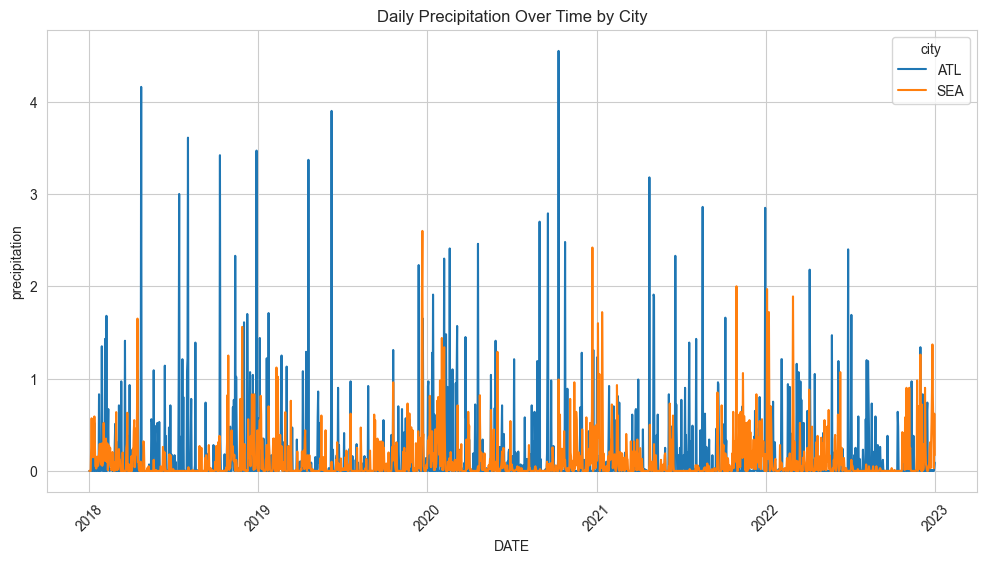

In [41]:
# Create a line plot of precipitation over time by city
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DATE', y='precipitation', hue='city')
plt.title('Daily Precipitation Over Time by City')
plt.xticks(rotation=45)
plt.show()

Key Patterns:

    - In general, there are higher peaks in Atlanta suggest more intense weather events.
    - More frequent but smaller spikes in Seattle
    - Seasonal variations are more visible for Seattle, while more constant in Atlanta


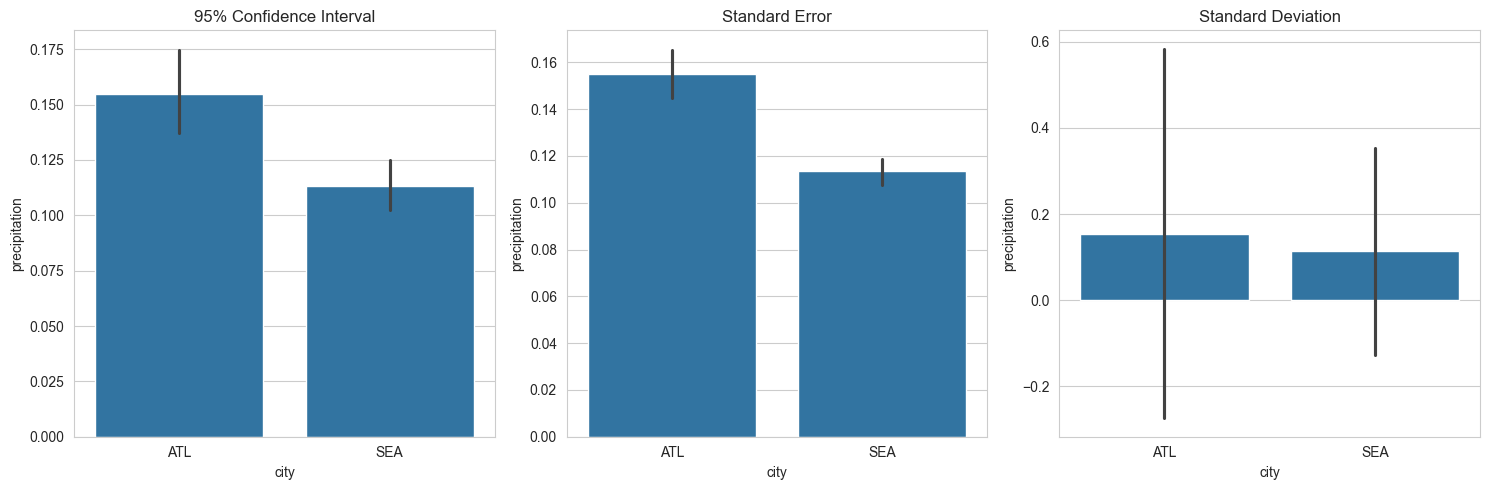

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=df, x='city', y='precipitation', ax=ax1)
ax1.set_title('95% Confidence Interval')

sns.barplot(data=df, x='city', y='precipitation', errorbar=('ci', 68), ax=ax2)
ax2.set_title('Standard Error')

sns.barplot(data=df, x='city', y='precipitation', errorbar='sd', ax=ax3)
ax3.set_title('Standard Deviation')

plt.tight_layout()
plt.show()

when specific the parameter error bar in barplot, we can either show the 95% CI around the mean by default or we can define a 68% CI or show the standard deviation or set it to None

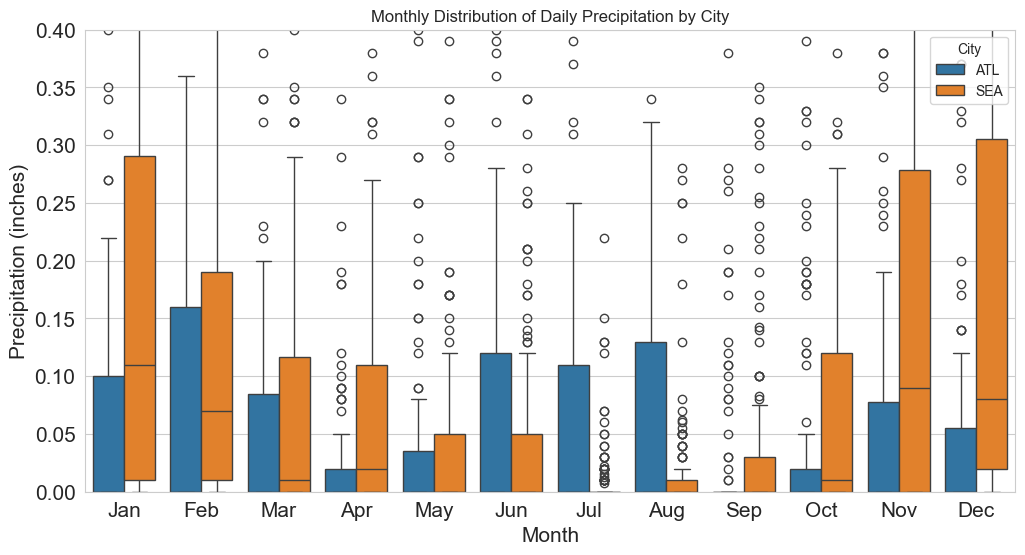

In [43]:
df['month'] = df['DATE'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='precipitation', hue='city')
plt.title('Monthly Distribution of Daily Precipitation by City')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.tick_params(labelsize=15)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12), labels=month_names)
plt.legend(title='City')
plt.ylim(0, 0.4)
plt.show()


Monthly Precipitation Visualization:
1. Seasonal Pattern:
    - Peak precipitation in winter months (Nov-Jan)
    - Distinct dryer season (Jul-Sep)
    - Aligns with broader regional patterns similar to Vancouver, BC, where I am from

2. Precipitation Distribution for Atlanta
    - Relatively uniform precipitation throughout year
    - Higher average rainfall during summer months
    - Atlanta shows more consistent precipitation amounts across months
    - More extreme rainfall events (outliers)
    
3. Precipitation Distribution for Seattle
    - Strong seasonal pattern
    - More consistent but lighter precipitation
    - Higher variability during summer despite lower overall rainfall

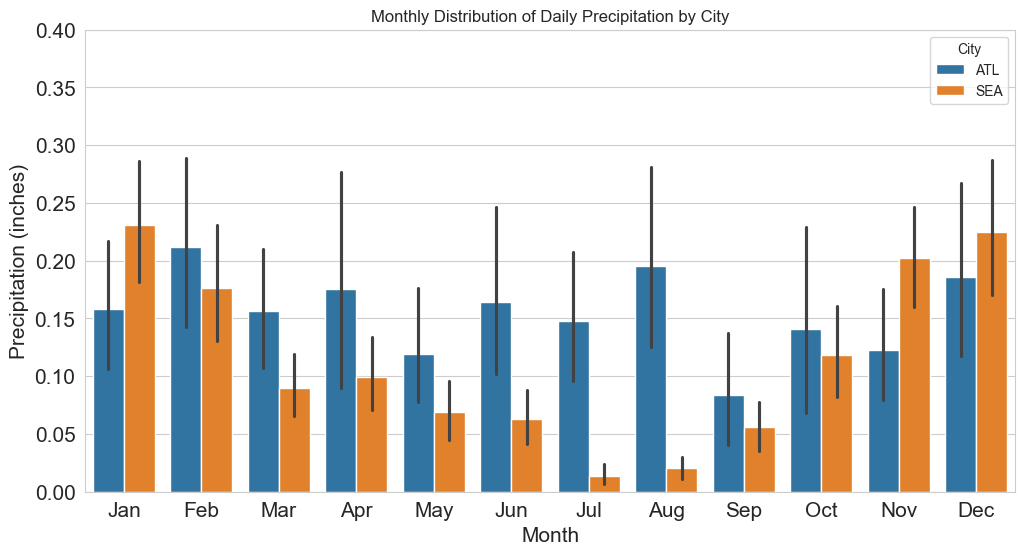

In [173]:
df['month'] = df['DATE'].dt.month

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month', y='precipitation', hue='city')
plt.title('Monthly Distribution of Daily Precipitation by City')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.tick_params(labelsize=15)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12), labels=month_names)
plt.legend(title='City')
plt.ylim(0, 0.4)
plt.show()

Key distinction from the box plot earlier:

    - Atlanta shows larger confidence intervals, confirming the higher variability seen in boxplot whiskers
    - Seattle's winter peak (Nov-Jan) is more prominently displayed in barplot
    - Summer precipitation differences between cities are more clearly visible in barplot format


#### Creating a column indicate whether that day rains or not

In [174]:
df['any_precipitation'] = df['precipitation'] > 0

In [46]:
df

,DATE,city,precipitation,month,any_precipitation
0,2018-01-01,ATL,0.00,1,False
1,2018-01-01,SEA,0.00,1,False
2,2018-01-02,ATL,0.00,1,False
3,2018-01-02,SEA,0.00,1,False
4,2018-01-03,ATL,0.00,1,False
...,...,...,...,...,...
3647,2022-12-29,SEA,0.03,12,True
3648,2022-12-30,ATL,0.03,12,True
3649,2022-12-30,SEA,0.62,12,True
3650,2022-12-31,ATL,0.09,12,True


#### Visualization Methods for Precipitation Frequency

Using the raw dataset with new column any_precipitation to visualize precipitation frequency:

    - Automatic calculation of daily rain probabilities
    - Built-in confidence intervals

Later, another way we can manual calculate via groupby operations, with additionl data manipulation to:

    - Calculate mean precipitation frequencies
    - Generate custom visualizations
    - Compare results across cities

Both methods effectively display rainfall patterns, though the direct method provides additional statistical reliability measures (the error bar).

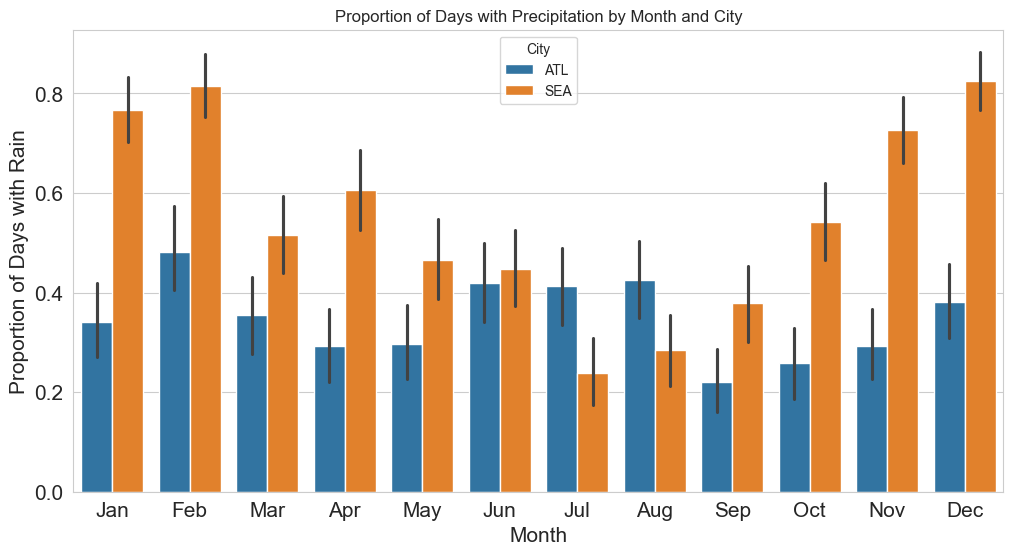

In [185]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month', y='any_precipitation', hue='city')
plt.title('Proportion of Days with Precipitation by Month and City')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Proportion of Days with Rain', fontsize=15)
plt.tick_params(labelsize=15)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12), labels=month_names)
plt.legend(title='City')
plt.show()

- Seattle experiences rain more frequently than Atlanta in 10 out of 12 months (majority of month rains more than 50% daysof the month.).
- Seattle shows distinct seasonal variation:
    - Highest frequency of rainy days in winter
    - Fewer rainy days during summer months

- Atlanta maintains consistnet rain frequency:
    - Approximately 30-40% of days have precipitation but no month went above 60%
    - Limited pattern of seasonal variation

Reformulation Research question to be more precise:

    - Rather than asking "Which city rains more?", the data reveals that Seattle has more rainy days overall, though this doesn't necessarily indicate higher rainfall amounts.



### Alternative Method: Monthly Rainfall Frequency Analysis



1. Add a new column indicating if any precipitation occurred

2. Calculate mean precipitation by city and month using groupby

3. Calculate and plot the proportion of days with any precipitation

Note: This aggregated analysis does not include confidence intervals since it uses summarized rather than raw data (that sns.barplot utilized for additional calculation). The previous visualization using the complete dataset provides additional statistical context through error bars.


In [186]:
monthly_mean = df.groupby(['city', 'month']).agg({
    'precipitation': 'mean',
    'any_precipitation': 'mean'
}).reset_index()

In [187]:
monthly_mean

,city,month,precipitation,any_precipitation
0,ATL,1,0.158000,0.341935
1,ATL,2,0.211560,0.482270
2,ATL,3,0.156839,0.354839
3,ATL,4,0.175600,0.293333
4,ATL,5,0.119355,0.296774
5,ATL,6,0.164133,0.420000
6,ATL,7,0.147419,0.412903
7,ATL,8,0.195290,0.425806
8,ATL,9,0.083333,0.220000
9,ATL,10,0.140645,0.258065


1. Looking at this table, we can clearly see:
- In Seattle, December sees the highest frequency of rain (82.6% of days)
- Atlanta's peak rain frequency occurs in February (48.2% of days)

2. Particularly April demonstrates distinct rainfall pattern between two cities:
- Seattle: Frequent but light rain (60.7% of days, 0.099 inches)
- Atlanta: Less frequent but intense rain (29.3% of days, 0.176 inches)

#### This visualization, we want to bar plot the proportion of rainfall each month between the two cities:

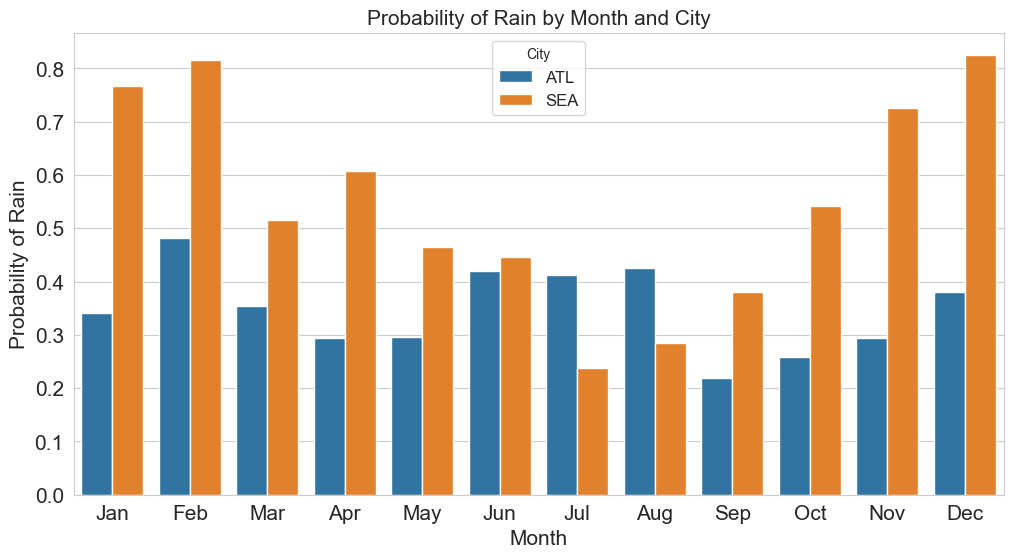

In [189]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_mean, x='month', y='any_precipitation', hue='city')

plt.title('Probability of Rain by Month and City', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Probability of Rain', fontsize=15)
plt.tick_params(labelsize=15)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12), labels=month_names)
plt.legend(title='City', fontsize=12)
plt.show()

The alternative calculation method confirms our earlier findings:

    - Seattle experiences more rainy days throughout most months
    - Clear seasonal pattern emerges:
        - Higher frequency of rain in winter
        - Reduced rainfall during summer months

### Additional Analysis
Now that I know that Seattle rains more days across each month but rain less intense, I wonder how much does it rain on rainy days only?

The reason I want to answer this question is because we all now know that it rains more consistently in Seattle through out the year. Furthermore, according to the EDA so far, we understand that it rains more intensely in Atlanta than Seattle because of the ratio between precipitation vs. frequency. However, I am curious how much exactly is intense?

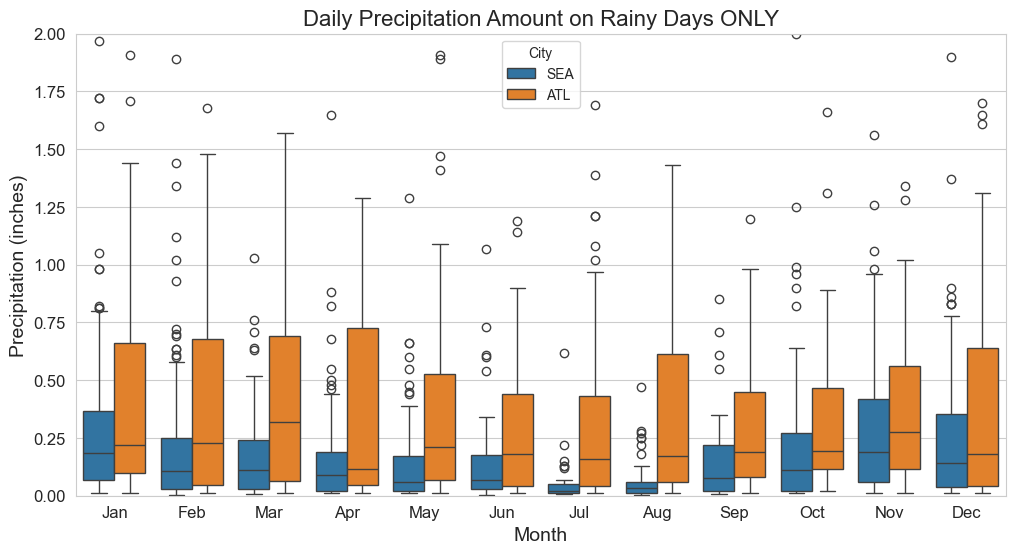

In [193]:

rainy_days_only_df = df[df['precipitation'] > 0].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(data=rainy_days_only_df, x='month', y='precipitation', hue='city')

plt.title('Daily Precipitation Amount on Rainy Days ONLY', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (inches)', fontsize=14)
plt.tick_params(labelsize=12)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12), labels=month_names)
plt.legend(title='City')
plt.ylim(0, 2)
plt.show()

Analysis of rainy days reveals a distinct pattern: while Seattle experiences more frequent precipitation, Atlanta's rainfall events are consistently more intense throughout the year. When rain occurs, Atlanta typically receives a higher volume of precipitation compared to Seattle's characteristically lighter rainfall.


### Conclusion

It better to avoid getting wet if we live in Atlanta, however, once it rains, it will be heavier and more intense event like thunderstorm etc.

On the other hand, Seattle are much more likely to experience rain on any given day, especially winter. However, rain is very light, more like a drizzle.

# Modelling

As we see our 2018-2022 data shows different average rainfall patterns between Atlanta and Seattle, we need to determine if these differences represent genuine climate characteristics or just random variation in our 5 year sample.

Key question in this section: Are these observational differences between Seattle and Atlanta statistically meaningful, or they could possibly differ by chance?

To answer this, I would conduct t test for numerical value and z test for categorical:

1. Determine if the differences are large enough to be consider "statisical significant"
2. Calculate the propability that these differences occured randomly
3. Assess whether the patterns we see likely represent true climate characteristic of each city

This analysis will allow us to distingush between meaningful climate differences in each month and random weather fluctuations in our limited sample period.

In [52]:
from scipy import stats

alpha = 0.05
significant_different = np.zeros(12)

for month in range(1, 13):
    seattle_month_data = df[(df['city'] == 'SEA') & (df['month'] == month)]['precipitation']
    atlanta_month_data = df[(df['city'] == 'ATL') & (df['month'] == month)]['precipitation']
    t_stat, p_value = stats.ttest_ind(seattle_month_data, atlanta_month_data, equal_var=False)

    if p_value < alpha:
        significant_different[month - 1] = 1

    print(f'Month: {month}, t-test: {t_stat:.4f}, p-value: {p_value:.4f}, Significant Different: {significant_different[month - 1]}')


Month: 1, t-test: 1.8167, p-value: 0.0702, Significant Different: 0.0
Month: 2, t-test: -0.7902, p-value: 0.4302, Significant Different: 0.0
Month: 3, t-test: -2.2294, p-value: 0.0268, Significant Different: 1.0
Month: 4, t-test: -1.4759, p-value: 0.1417, Significant Different: 0.0
Month: 5, t-test: -1.7380, p-value: 0.0835, Significant Different: 0.0
Month: 6, t-test: -2.5621, p-value: 0.0112, Significant Different: 1.0
Month: 7, t-test: -4.4022, p-value: 0.0000, Significant Different: 1.0
Month: 8, t-test: -4.2948, p-value: 0.0000, Significant Different: 1.0
Month: 9, t-test: -1.0471, p-value: 0.2963, Significant Different: 0.0
Month: 10, t-test: -0.4673, p-value: 0.6408, Significant Different: 0.0
Month: 11, t-test: 2.3624, p-value: 0.0188, Significant Different: 1.0
Month: 12, t-test: 0.7812, p-value: 0.4354, Significant Different: 0.0


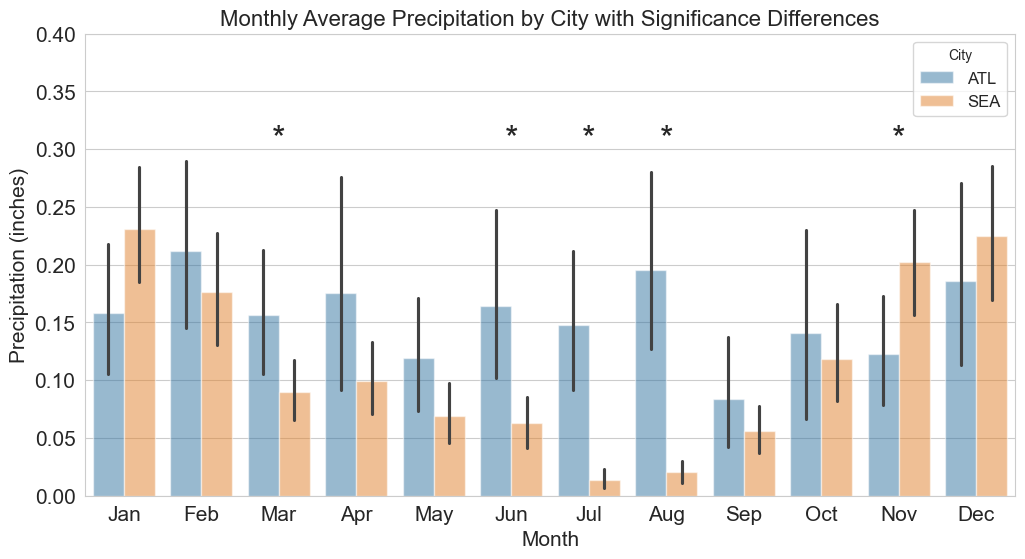

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month', y='precipitation', hue='city', alpha=0.5)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12), labels=month_names)

for month in range(12):
    if significant_different[month] == 1:
        plt.text(month, 0.3, '*', ha='center', fontsize=25)

plt.title('Monthly Average Precipitation by City with Significance Differences', fontsize=16)
plt.legend(title='City', fontsize=12)
plt.ylim(0, 0.4)
plt.show()

### Key findings from our statistical significant table and visualization:

1. Summer Rainfall (June - August)
    - Atlanta experience significantly higher rainfall than Seattle
    - The pattern is statistical significantly difference in mean, not due to random chance (analogically like flip coin 50/50)

2. Late Autumn (November)
    - Seattle shows significantly higher precipitation than Atlanta
    - Statistical tests confirm this is a reliable climate characteristic
    - However, if you look at confidence interval (black vertical bar) visually, initially you would thought it is not statistically significant.
        - This confirm statistical test is crucial for statistical precision

3. Rest of the Year
    - Despite visible difference in average rainfall
    - Variation are not statistically significant
    - Any observed differece could be due to random sampling

What does this mean?

Imagine flipping a coin, sometime we get 60% heads eventhough, in theoritcal distribution, it's 50/50. Similarly, while we see differences in rainfall throughout the year, only the summer and late autumn are strong enough to be considered genuine climate characteristic in each cities (they're different).

In short, this analysis helps people who lives in these two cities or foreiners understand when to truly expect significant differences in rainfall between these two cities when they visit or plan their visit; rather than relying on general perceptions or short-term observations.

## Analyzing Rainfall Statisitcal Signifcant of Frequency Patterns

To determine if Seattle and Atlanta truly differ in how often it rains, we will analyze the proportion of rainy days in each city using a z-test. This statistical method is particularly designed for comparing percentages or proportions between group. 

Why use z-test and not t-test?
    
    - While t-tests help us compare average rainfall amounts, z-tests are better answering the question: "Does one city consistently have more rain days than the other, or is the differrence we see just due to chance?"

Throughout this analysis, we will learn whether observed differences in the number of rainy days each month represent genuine climate characteristic in each city or just merely a random variation in our sample?

In [54]:
from statsmodels.stats.proportion import proportions_ztest

# creating an zeros entry list to store significant differences
significant_different = np.zeros(12)
alpha = 0.05

for month in range(1, 13):
    contingency_table = pd.crosstab(
        df.loc[df['month'] == month, 'city'],
        df.loc[df['month'] == month, 'any_precipitation']
    )

    days_with_precipitation = contingency_table[True]
    total_counts = contingency_table.sum(axis=1)

    zstats, p_value = proportions_ztest(
        count=days_with_precipitation,
        nobs=total_counts,
        alternative='two-sided'
    )

    if p_value < alpha:
        significant_different[month - 1] = 1
    
    print(f'Month: {month}, z-stat: {zstats:.4f}, p-value: {p_value:.4f}, Significant Different: {significant_different[month - 1]}')

Month: 1, z-stat: -7.5426, p-value: 0.0000, Significant Different: 1.0
Month: 2, z-stat: -5.8638, p-value: 0.0000, Significant Different: 1.0
Month: 3, z-stat: -2.8637, p-value: 0.0042, Significant Different: 1.0
Month: 4, z-stat: -5.4544, p-value: 0.0000, Significant Different: 1.0
Month: 5, z-stat: -3.0413, p-value: 0.0024, Significant Different: 1.0
Month: 6, z-stat: -0.4660, p-value: 0.6412, Significant Different: 0.0
Month: 7, z-stat: 3.2720, p-value: 0.0011, Significant Different: 1.0
Month: 8, z-stat: 2.6115, p-value: 0.0090, Significant Different: 1.0
Month: 9, z-stat: -3.0237, p-value: 0.0025, Significant Different: 1.0
Month: 10, z-stat: -5.1011, p-value: 0.0000, Significant Different: 1.0
Month: 11, z-stat: -7.5071, p-value: 0.0000, Significant Different: 1.0
Month: 12, z-stat: -8.0104, p-value: 0.0000, Significant Different: 1.0


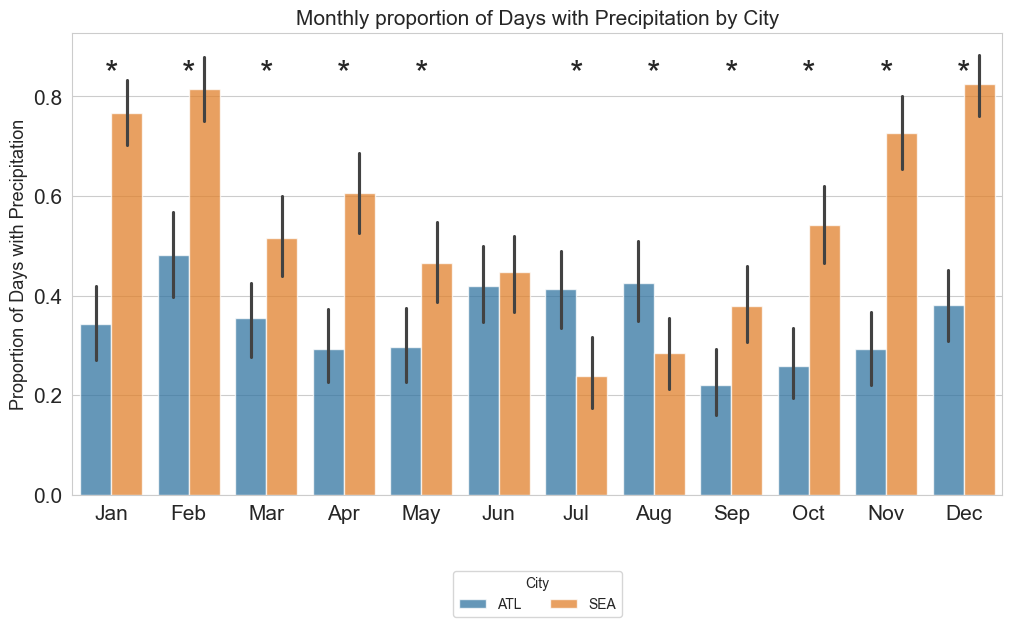

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month', y='any_precipitation', hue='city', alpha=0.75)

plt.xlabel(None)
plt.ylabel('Proportion of Days with Precipitation', fontsize=13)

plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12), labels=month_names)

for month in range(12):
    if significant_different[month] == 1:
        plt.text(month, 0.825, '*', ha='center', fontsize=25)

plt.title('Monthly proportion of Days with Precipitation by City', fontsize=15)
plt.legend(title='City', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()

1. Frequency of Rainy Days
    - Seattle experiences significantly more rainy days for most of the year (January-May, September-December)
    - Alanta has significanly more rain days during peak summer (July-August)
    - June shows no significant difference between the cities.

2. What this means for residents and Visitors:
    - If going to Seattle: Pack a light raincoat year-round, exception for summer
    - If going to Atlanta: bring an umbrealla for summer thunderstorms

Staistical Confidence: In our analysis, we show these patterns are consistent climate characteristics in majority of months, except June, not random weather variations. This helps visitors and residents to reliably plan for each city's typical weather conditions throughout the year. It might be uncertain to visit in June in both city.

### Ethical Considerations and Conclusion

Our analysis of Seattle and Atlanta's rainfall pattern from 2018 to 2022 reveals distinct precipitation characteristics we where can confidently conclude:

1. Main Findings
    - Seattle has more frequent ut lighter rainfall, especially in winter
    - Atlanta has less frequent but more intense rainfall (when it does rain, it connsistently has high precipitation - e.g thunderstorm), particularly early Summer
2. Travel Recommendations:
    - Seattle visitor should pack a light raincoat year-round, except summmer
    - Atlanta visitor would benefit to prepare for occasional heavy thunderstorms, especially i the early summer

3. Study Limitations:
    - 5-year data window (2018-2022)
    - Single weather station per city
    - Results may not represent entire metropolitan areas

4. Methodological Integrity:
    - Statistical testing validates climate patterns
    - Transparent reporting of uncertainty
    - Balanced comparison using multiple metrics 
        - proportion of rainy days vs precipitation averages vs average precipitation of rainy days ONLY
    - Clear documentation for reproducibility
        - step by step guidance and explanation